In [4]:

import pandas as pd

column_names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']

df = pd.read_csv('Twitter.analysis.csv', 
                 encoding='iso-8859-1',
                 names=column_names, 
                 header=None)

df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.describe()


,sentiment,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
df = df[['sentiment', 'text']]

df['sentiment'] = df['sentiment'].replace({4: 1})

df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


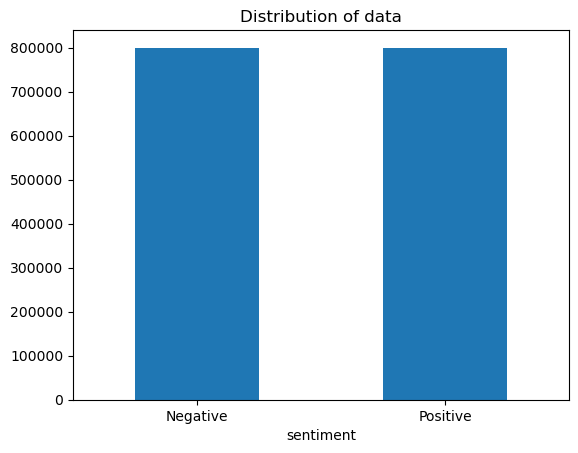

             text
sentiment        
0          800000
1          800000


In [9]:
import matplotlib.pyplot as plt

group = df.groupby('sentiment').count()

ax = group.plot(kind='bar', legend=False)

plt.title('Distribution of data')

ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

plt.show()

print(group)

In [16]:
text = df['text'].tolist()

sentiment = df['sentiment'].tolist()

# Inspecting the text and sentiment data
print("Text data:")
print(text[:5])
print("\nSentiment labels:")
print(sentiment[:5])

Text data:
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

Sentiment labels:
[0, 0, 0, 0, 0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_text, sentiment, test_size=0.05, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configure the TfidfVectorizer with specific parameters
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Learn the vocabulary and IDF weights from the training data
vectorizer.fit(X_train)

# Transform the training data into TF-IDF numerical representations
X_train_tfidf = vectorizer.transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Create an instance of the Bernoulli Naive Bayes model
BNBmodel = BernoulliNB(alpha=2)

# Train the model
BNBmodel.fit(X_train_tfidf, y_train)

# Make predictions on the test dataset
y_pred = BNBmodel.predict(X_test_tfidf)

# Calculate the accuracy of the model's predictions
accuracy1 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy1)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SVCmodel = LinearSVC(dual=True)

SVCmodel.fit(X_train_tfidf, y_train)
y_pred = SVCmodel.predict(X_test_tfidf)

accuracy2 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

LRmodel.fit(X_train_tfidf, y_train)

y_pred = LRmodel.predict(X_test_tfidf)

accuracy3 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes model
MNBmodel = MultinomialNB(alpha=1)

# Train the model
MNBmodel.fit(X_train_tfidf, y_train)

# Make predictions on the test dataset
y_pred = MNBmodel.predict(X_test_tfidf)

# Calculate the accuracy of the model's predictions
accuracy_MNB = accuracy_score(y_test, y_pred)

print("Multinomial Naive Bayes Accuracy:", accuracy_MNB)

In [ ]:
from sklearn.metrics import classification_report

print("LinearSVC Classifier Report:")
print(classification_report(y_test, SVCmodel.predict(X_test_tfidf)))

print("BernoulliNB Classifier Report:")
print(classification_report(y_test, BNBmodel.predict(X_test_tfidf)))

print("LogisticRegression Classifier Report:")
print(classification_report(y_test, LRmodel.predict(X_test_tfidf)))

print("Multinomial Naive Bayes Classifier Report:")
print(classification_report(y_test, MNBmodel.predict(X_test_tfidf)))

In [ ]:
models = ['LinearSVC', 'BernoulliNB', 'LogisticRegression', 'MultinomialNB']
accuracies = [accuracy2, accuracy1, accuracy3, accuracy_MNB]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

In [ ]:
text = ["I hate twitter",
        "May the Force be with you.",
        "Mr. Stark, I am not feeling well."]

# Transform text data using the same TfidfVectorizer instance used for training data
X_text = vectorizer.transform(text)

# Predict sentiment labels (0 for negative, 1 for positive)
sentiments = LRmodel.predict(X_text)

# Store predicted sentiments and text samples in a new list
data = [{'text': text[i], 'sentiment': sentiments[i]} for i in range(len(text))]

df = pd.DataFrame(data)

# Replace sentiment labels with descriptive labels
df['sentiment'] = df['sentiment'].map({0: 'Negative', 1: 'Positive'})

print(df)